# Regression

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 

from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/Users/sudeshgurung/Msc-Data_Analytics/ADTA_with_python/Course_work_1/Census.csv')
df.dtypes

Person ID                      int64
Region                        object
Residence Type                object
Family Composition             int64
Population Base                int64
Sex                            int64
Age                            int64
Marital Status                 int64
Student                        int64
Country of Birth               int64
Health                         int64
Ethnic Group                   int64
Religion                       int64
Economic Activity              int64
Occupation                     int64
Industry                       int64
Hours worked per week          int64
No of hours                  float64
Approximated Social Grade      int64
dtype: object

In [3]:
#mapping 
family_comp = {
    1 : "Not in a family", 
    2: "Married/same-sex civil partnership couple family", 
    3: "Cohabiting couple family",
    4: "Lone parent family (male head)",
    5: "Lone parent family (female head)", 
    6: "Other related family", 
    -9: "No code required"
}
population_base = {
    1: "Usual resident",
    2: "Student living away from home during term-time",
    3: "Short-term resident"
}
sex = {
    1: "Male",
    2: "Female"
}
age = {
    1: "0to15",
    2: "16to24",
    3: "25to34",
    4:"35to44",
    5: "45to54",
    6: "55to64",
    7: "65to74",
    8: "75 and over"
}
marital_status = {
    1: "Single (never married or never registered a same-sex civil partnership)",
    2: "Married or in a registered same-sex civil partnership",
    3: "Separated but still legally married or separated but still legally in a same-sex civil partnership",
    4: "Divorced or formerly in a same-sex civil partnership which is now legally dissolved",
    5: "Widowed or surviving partner from a same-sex civil partnership",
}
student = {
    1:" Yes",
    2: "No"
}
country_of_birth = {
    1: "UK",
    2: "Non UK",
    -9: "No code required"
}
health = {
    1: "Very good health",
    2: "Good health",
    3: "Fair health",
    4: "Bad health",
    5: "Very bad health",
    -9: "No code required"
}
ethnic_group = {
    1: "White", 
    2: "Mixed", 
    3: "Asian and Asian British", 
    4: "Black or Black British", 
    5: "Chinese or Other ethnic group",
    -9: "No code required"
}
religion = {
    1: "No religion",
    2: "Christian",
    3: "Buddhist",
    4: "Hindu",
    5: "Jewish",
    6: "Muslim",
    7: "Sikh",
    8: "Other religion",
    9: "Not stated",
    -9:" No code required "
}
economic_activity = {
    1: "Economically active: Employee",
    2: "Economically active: Self-employed",
    3: "Economically active: Unemployed",
    4: "Economically active: Full-time student",
    5: "Economically inactive: Retired",
    6: "Economically inactive: Student",
    7:" Economically inactive: Looking after home or family",
    8: "Economically inactive: Long-term sick or disabled",
    9: "Economically inactive: Other",
    -9: "No code required",
}
occupation = {
    1: "Managers, Directors and Senior Officials",
    2: "Professional Occupations",
    3:" Associate Professional and Technical Occupations",
    4: "Administrative and Secretarial Occupations",
    5: "Skilled Trades Occupations",
    6:" Caring, Leisure and Other Service Occupations",
    7: "Sales and Customer Service Occupations",
    8: "Process, Plant and Machine Operatives",
    9: "Elementary Occupations",
    -9: "No code required ",
    }
industry = {
    1: "Agriculture, forestry and fishing",
    2: "Mining and quarrying; Manufacturing;Electricity, gas, steam and air conditioning system; Water supply",
    3: "Construction",
    4: "Wholesale and retail trade; Repair of motor vehicles and motorcycles",
    5: "Accommodation and food service activities",
    6: "Transport and storage; Information and communication",
    7: "Financial and insurance activities; Intermediation",
    8: "Real estate activities; Professional, scientific and technical activities; Administrative and support service activities",
    9: "Public administration and defence; compulsory social security",
    10: "Education",
    11: "Human health and social work activities",
    12: "Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies",
    -9: "No code required "
}
hours_worked_per_week = {
    1: "Part-time: 15 or less hours worked",
    2:"Part-time: 16 to 30 hours worked",
    3: "Full-time: 31 to 48 hours worked",
    4: "Full-time: 49 or more hours worked",
    -9: "No code required",
}
approx_sc_grade = {
    1: "AB",
    2: "C1",
    3: "C2",
    4: "DE",
    -9: "No code required"
}

In [4]:
df['Family Composition'].replace(family_comp, inplace = True)
df['Population Base'].replace(population_base, inplace = True)
df['Sex'].replace(sex, inplace = True)
df['Age'].replace(age, inplace = True)
df['Marital Status'].replace(marital_status, inplace = True)
df['Student'].replace(student, inplace = True)
df['Country of Birth'].replace(country_of_birth, inplace = True)
df['Health'].replace(health, inplace = True)
df['Ethnic Group'].replace(ethnic_group, inplace = True)
df['Religion'].replace(religion, inplace = True)
df['Economic Activity'].replace(economic_activity, inplace = True)
df['Occupation'].replace(occupation, inplace = True)
df['Industry'].replace(industry, inplace = True)
df['Hours worked per week'].replace(hours_worked_per_week, inplace = True)
df['Approximated Social Grade'].replace(approx_sc_grade, inplace = True)

df


,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,Married/same-sex civil partnership couple family,Usual resident,Female,55to64,Married or in a registered same-sex civil part...,No,UK,Good health,White,Christian,Economically inactive: Retired,"Process, Plant and Machine Operatives",Mining and quarrying; Manufacturing;Electricit...,No code required,NaN,DE
1,7394832,E12000001,H,Cohabiting couple family,Usual resident,Female,0to15,Single (never married or never registered a sa...,No,UK,Good health,White,No religion,No code required,No code required,No code required,No code required,NaN,No code required
2,7394719,E12000001,H,Married/same-sex civil partnership couple family,Usual resident,Male,65to74,Married or in a registered same-sex civil part...,No,UK,Very good health,White,Christian,Economically inactive: Retired,"Process, Plant and Machine Operatives",Mining and quarrying; Manufacturing;Electricit...,No code required,NaN,C1
3,7394840,E12000001,H,Not in a family,Usual resident,Female,55to64,Divorced or formerly in a same-sex civil partn...,No,UK,Fair health,White,Christian,Economically inactive: Retired,Elementary Occupations,Accommodation and food service activities,No code required,NaN,DE
4,7394711,E12000001,H,Married/same-sex civil partnership couple family,Usual resident,Male,0to15,Single (never married or never registered a sa...,Yes,UK,Very good health,White,No religion,No code required,No code required,No code required,No code required,NaN,No code required
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,7680019,E12000008,C,No code required,Usual resident,Male,16to24,Single (never married or never registered a sa...,No,Non UK,Very good health,White,Christian,Economically active: Employee,Associate Professional and Technical Occupations,Public administration and defence; compulsory ...,Full-time: 49 or more hours worked,52.0,No code required
569736,7675184,E12000008,C,No code required,Usual resident,Male,25to34,Single (never married or never registered a sa...,No,Non UK,Good health,Mixed,No religion,Economically active: Employee,"Managers, Directors and Senior Officials",Accommodation and food service activities,Full-time: 49 or more hours worked,55.0,No code required
569737,7675176,E12000008,C,No code required,Usual resident,Female,45to54,Married or in a registered same-sex civil part...,No,UK,Very good health,White,Christian,Economically active: Self-employed,"Managers, Directors and Senior Officials","Real estate activities; Professional, scientif...",Full-time: 49 or more hours worked,49.0,No code required
569738,7944614,W92000004,H,Married/same-sex civil partnership couple family,Usual resident,Male,55to64,Married or in a registered same-sex civil part...,No,UK,Fair health,White,No religion,Economically active: Employee,"Caring, Leisure and Other Service Occupations",Education,Full-time: 49 or more hours worked,53.0,C2


In [5]:
df.isna().sum()

Person ID                         0
Region                            0
Residence Type                    0
Family Composition                0
Population Base                   0
Sex                               0
Age                               0
Marital Status                    0
Student                           0
Country of Birth                  0
Health                            0
Ethnic Group                      0
Religion                          0
Economic Activity                 0
Occupation                        0
Industry                          0
Hours worked per week             0
No of hours                  302321
Approximated Social Grade         0
dtype: int64

In [6]:
df = df.drop(columns =['Person ID'])
df = df.dropna()
df.isna().sum()

Region                       0
Residence Type               0
Family Composition           0
Population Base              0
Sex                          0
Age                          0
Marital Status               0
Student                      0
Country of Birth             0
Health                       0
Ethnic Group                 0
Religion                     0
Economic Activity            0
Occupation                   0
Industry                     0
Hours worked per week        0
No of hours                  0
Approximated Social Grade    0
dtype: int64

In [7]:
#test and train data 
X = df.drop(columns =['No of hours'])
y = df['No of hours']

In [8]:
#encoding data 
#encoding ordinally here leads to low R2 
# oe = OrdinalEncoder()
# X['Age'] = oe.fit_transform(X[['Age']])
# X['Hours worked per week'] = oe.fit_transform(X[['Hours worked per week']])
# X

#dummy encoding the rest 
X = pd.get_dummies(X)
X

# oe = OrdinalEncoder() 
# transformed_data = oe.fit_transform(X)
# trans_df = pd.DataFrame(data=transformed_data, index=X.index, columns=X.columns)
# trans_df
# this leads to low r2 


,Region_E12000001,Region_E12000002,Region_E12000003,Region_E12000004,Region_E12000005,Region_E12000006,Region_E12000007,Region_E12000008,Region_E12000009,Region_W92000004,...,Industry_Wholesale and retail trade; Repair of motor vehicles and motorcycles,Hours worked per week_Full-time: 31 to 48 hours worked,Hours worked per week_Full-time: 49 or more hours worked,Hours worked per week_Part-time: 15 or less hours worked,Hours worked per week_Part-time: 16 to 30 hours worked,Approximated Social Grade_AB,Approximated Social Grade_C1,Approximated Social Grade_C2,Approximated Social Grade_DE,Approximated Social Grade_No code required
302321,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
302322,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
302323,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
302324,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
302325,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
569736,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
569737,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
569738,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [9]:
#scaling the X

#it doesnot work for dummy encoding
# min_max_scaler = MinMaxScaler() 
# scaled_x = min_max_scaler.fit_transform(X)
# print(scaled_x)
# scaled_x_df = pd.DataFrame(data = scaled_x, index=X.index, columns= X.columns)
# scaled_x_df

#standard scaler
# scaler = StandardScaler()
# scaled_x = scaler.fit_transform(X)
# scaled_x_df = pd.DataFrame(data=scaled_x, index=X.index, columns=X.columns)
# scaled_x_df

# scaling here makes no difference 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Linear Regression

In [11]:
#linear regression 
lr_model = LinearRegression()

#fit the classifier to the data
lr_model.fit(X_train,y_train)

LinearRegression()

In [12]:
#use the resulting model to predict value on the test sey
y_pred = lr_model.predict(X_test)

In [13]:
p = pd.DataFrame(y_test)


In [14]:
p['Prediction'] = y_pred
p.sample(10)

,No of hours,Prediction
371261,17.0,23.022461
361592,26.0,22.947266
358220,25.0,23.185547
470676,37.0,39.560547
392939,37.0,39.567383
423368,46.0,39.359375
413427,47.0,39.400391
378027,24.0,22.890625
409624,33.0,39.654297
431933,35.0,39.416016


In [15]:
#performance metrics
# Evaluating the model using Adjusted R² Evaluation Metric

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)

d = {
    'Mean Absolute Error': [mae], 
    'Mean Squared Error': [mse], 
    'Root Mean Squared Error': [rmse], 
    'R2 score': [r2], 
    'Adjusted R2 score': [adj_r2]
}
stat_list = list({mae, mse, rmse, r2, adj_r2})

stat_col = list({'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 score', 'Adjusted R2 score'})

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')
print("R2 score:", r2_score(y_test, y_pred))
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)



Mean Absolute Error: 4.063443026867069
Mean Squared Error: 22.405796673054606
Root Mean Squared Error: 4.733476172228461 

R2 score: 0.8782802953895535
Adjusted R2 score: 0.8781420707518274


In [16]:
stats = pd.DataFrame(d, index=['Statistics'])
stats.transpose()


,Statistics
Mean Absolute Error,4.063443
Mean Squared Error,22.405797
Root Mean Squared Error,4.733476
R2 score,0.878280
Adjusted R2 score,0.878142


[Text(0.5, 1.0, 'Predicting of No of hours using Linear Regression')]

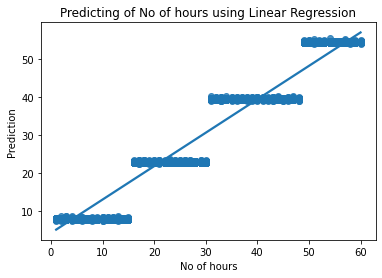

In [17]:
sns.regplot(data= p, x='No of hours', y='Prediction').set(title="Predicting of No of hours using Linear Regression")

## Random Forest Regression 

In [18]:
# Random forest algorithm 
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 1)

In [19]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [20]:
y_pred = rf_model.predict(X_test)
y_pred

array([20.9675    , 40.67      , 42.43333333, ..., 23.85      ,
       38.975     , 52.4       ])

In [21]:
p = pd.DataFrame(y_test)
p['Prediction'] = y_pred
p.sample(10)

,No of hours,Prediction
358569,17.0,23.200000
452964,38.0,37.176127
420446,34.0,38.557500
473609,39.0,40.300000
532997,35.0,40.109286
496250,41.0,37.600000
541607,53.0,53.500000
568430,51.0,54.948810
333937,26.0,22.668766
420639,31.0,42.916667


[Text(0.5, 1.0, 'Predicting of No of hours using Random Forest Regression')]

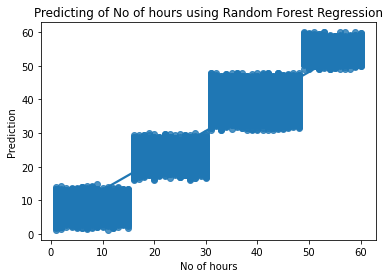

In [22]:
sns.regplot(data= p, x='No of hours', y='Prediction').set(title="Predicting of No of hours using Random Forest Regression")

In [23]:
#performance metrics
# Evaluating the model using Adjusted R² Evaluation Metric

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)

d = {
    'Mean Absolute Error': [mae], 
    'Mean Squared Error': [mse], 
    'Root Mean Squared Error': [rmse], 
    'R2 score': [r2], 
    'Adjusted R2 score': [adj_r2]
}
stat_list = list({mae, mse, rmse, r2, adj_r2})

stat_col = list({'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 score', 'Adjusted R2 score'})

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')
print("R2 score:", r2_score(y_test, y_pred))
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)


Mean Absolute Error: 4.36855000862449
Mean Squared Error: 27.461277875334403
Root Mean Squared Error: 5.240350930551732 

R2 score: 0.8508163454312292
Adjusted R2 score: 0.8506469327903308


In [24]:
stats = pd.DataFrame(d, index=['Statistics'])
stats.transpose()


,Statistics
Mean Absolute Error,4.368550
Mean Squared Error,27.461278
Root Mean Squared Error,5.240351
R2 score,0.850816
Adjusted R2 score,0.850647
